In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv(r'/Users/kokyongang/Documents/Data Analysis/Real Projects/NZ Car Owner Dataset/Car_Data.csv')
print("Dataset loaded.")
print(f"Shape: {df.shape}\n")

df.info()

Dataset loaded.
Shape: (300000, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             300000 non-null  object
 1   Year_of_birth      300000 non-null  int64 
 2   DriverID           300000 non-null  object
 3   Name               300000 non-null  object
 4   Register_year      300000 non-null  int64 
 5   Purchase_date      300000 non-null  object
 6   Number_Plate       300000 non-null  object
 7   Purchase_year      300000 non-null  int64 
 8   Car_status         300000 non-null  object
 9   Car_Make           300000 non-null  object
 10  Car_Model          300000 non-null  object
 11  Fuel_economy       300000 non-null  int64 
 12  Seat_number        300000 non-null  int64 
 13  Vehicle_type       300000 non-null  object
 14  Vehicle_shape      300000 non-null  object
 15  Country_of_origin  300000 non-n

In [18]:
# Phase 1: Data Cleaning & Quality Assessment

# 1.1 Check for missing values & percentages
missing_count = df.isnull().sum()
print("\nMissing Values Percentage:")
missing_percentage = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
'Missing_Count': missing_count,
'Missing_Percentage': missing_percentage.round(2)
}).sort_values('Missing_Percentage', ascending=False)

print(missing_summary)


Missing Values Percentage:
                   Missing_Count  Missing_Percentage
Gender                         0                 0.0
Year_of_birth                  0                 0.0
DriverID                       0                 0.0
Name                           0                 0.0
Register_year                  0                 0.0
Purchase_date                  0                 0.0
Number_Plate                   0                 0.0
Purchase_year                  0                 0.0
Car_status                     0                 0.0
Car_Make                       0                 0.0
Car_Model                      0                 0.0
Fuel_economy                   0                 0.0
Seat_number                    0                 0.0
Vehicle_type                   0                 0.0
Vehicle_shape                  0                 0.0
Country_of_origin              0                 0.0


In [21]:
# 1.2 Data type standardisation

df_clean = df.copy()

# Convert date columns to proper datetime format
if 'Purchase_date' in df_clean.columns:
    df_clean['Purchase_date'] = pd.to_datetime(df_clean['Purchase_date'], errors='coerce')

# Ensure vategorical variables are properly typed
categorical_columns = ['Gender', 'Car_status', 'Car_Make', 'Car_Model',
'Vehicle_type', 'Vehicle_shape', 'Country_of_origin']

for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

print("Data type standardisation completed.")

Data type standardisation completed.


In [22]:
# 1.3 Feature engineering

# Calculate age from birth year (current year is 2025)
current_year = 2025
if 'Year_of_birth' in df_clean.columns:
    df_clean['Age'] = current_year - df_clean['Year_of_birth']

# Calculate years since purchase
if 'Purchase_year' in df_clean.columns:
    df_clean['Years_since_purchase'] = current_year - df_clean['Purchase_year']

# Remove duplicates
print(f"Duplicates found: {df_clean.duplicated().sum()}")
df_clean.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {df_clean.shape}")


Duplicates found: 0
Dataset shape after removing duplicates: (300000, 18)



GENDER - Value Counts:
         Count  Percentage
Gender                    
Male    152568       50.86
Female  147432       49.14
Unique values in Gender: 2


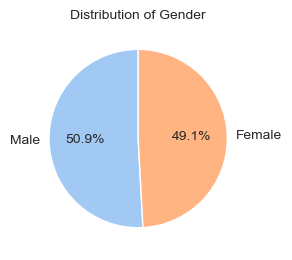

--------------------------------------------------

CAR_STATUS - Value Counts:
             Count  Percentage
Car_status                    
OLD         214062       71.35
NEW          85938       28.65
Unique values in Car_status: 2


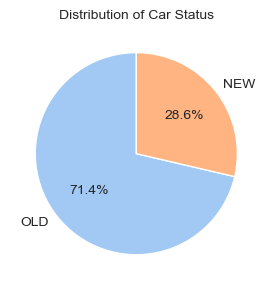

--------------------------------------------------

CAR_MAKE - Value Counts:
                Count  Percentage
ford            29613        9.87
toyota          28649        9.55
mitsubishi      27149        9.05
nissan          19737        6.58
mazda           13954        4.65
mercedes-benz   13894        4.63
honda           11957        3.99
bmw             11499        3.83
holden          11156        3.72
Others         132392       44.13
Unique values in Car_Make: 245


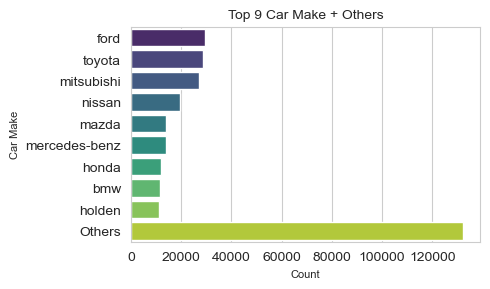

--------------------------------------------------

CAR_MODEL - Value Counts:
                 Count  Percentage
range rover        524        0.17
astra              484        0.16
vectra             466        0.16
roadster           415        0.14
coupe              392        0.13
discovery          361        0.12
grand cherokee     360        0.12
s                  353        0.12
defender           351        0.12
Others          296294       98.76
Unique values in Car_Model: 44918


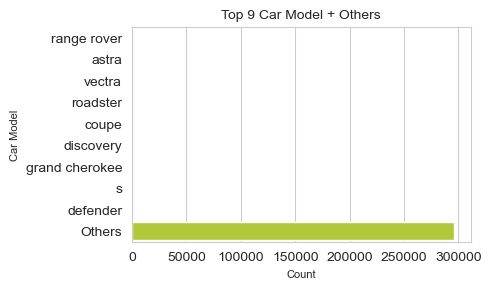

--------------------------------------------------

VEHICLE_TYPE - Value Counts:
           Count  Percentage
petrol    211768       70.59
diesel     87891       29.30
lpg          145        0.05
electric     102        0.03
cng           58        0.02
other         36        0.01
Others         0        0.00
Unique values in Vehicle_type: 6


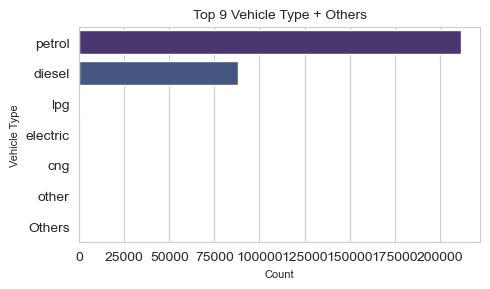

--------------------------------------------------

VEHICLE_SHAPE - Value Counts:
                 Count  Percentage
saloon           89964       29.99
station wagon    45438       15.15
hatchback        39231       13.08
other truck      28421        9.47
utility          20468        6.82
sports car       16120        5.37
light van        16054        5.35
convertible       8557        2.85
flat-deck truck   8211        2.74
Others           27536        9.18
Unique values in Vehicle_shape: 24


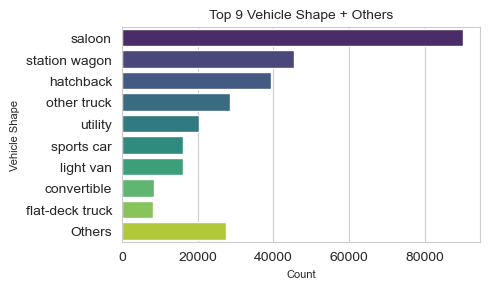

--------------------------------------------------

COUNTRY_OF_ORIGIN - Value Counts:
                 Count  Percentage
japan           144264       48.09
germany          35669       11.89
australia        25707        8.57
united kingdom   23116        7.71
united states    13421        4.47
new zealand       9997        3.33
sweden            8631        2.88
france            7794        2.60
south korea       7407        2.47
Others           23994        8.00
Unique values in Country_of_origin: 34


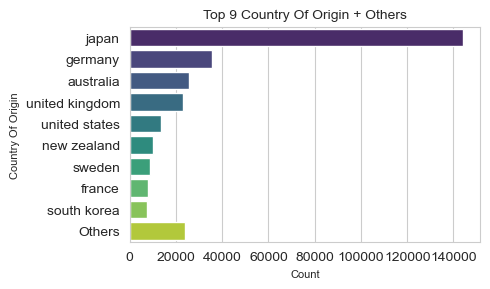

--------------------------------------------------


In [25]:
# Phase 2: Exploratory Data Analysis

# 2.1 Demographic Analysis

sns.set_style("whitegrid")

# Analyze categorical variables
categorical_columns = ['Gender', 'Car_status', 'Car_Make', 'Car_Model', 
                       'Vehicle_type', 'Vehicle_shape', 'Country_of_origin']

for col in categorical_columns:
    if col in df_clean.columns:
        try:
            # Print the header
            print(f"\n{col.upper()} - Value Counts:")
            
            # Perform calculations
            value_counts = df_clean[col].value_counts()
            percentages = df_clean[col].value_counts(normalize=True) * 100
            
            unique_count = df_clean[col].nunique()
            
            # Modify summary based on number of unique values
            if unique_count <= 5:
                # Show all categories for small number of unique values
                summary = pd.DataFrame({
                    'Count': value_counts,
                    'Percentage': percentages.round(2)
                })
                print(summary.head(10))
            else:
                # Show top 9 + Others for large number of unique values
                top_9_counts = value_counts.head(9)
                top_9_percentages = percentages.head(9)
                others_count = value_counts.iloc[9:].sum()
                others_percentage = percentages.iloc[9:].sum()
                
                # Create summary with top 9 + Others
                display_counts = pd.concat([top_9_counts, pd.Series([others_count], index=['Others'])])
                display_percentages = pd.concat([top_9_percentages, pd.Series([others_percentage], index=['Others'])])
                
                summary = pd.DataFrame({
                    'Count': display_counts,
                    'Percentage': display_percentages.round(2)
                })
                print(summary)
            
            print(f"Unique values in {col}: {df_clean[col].nunique()}")
            
            # Plotting of chart
            if unique_count <= 5:
                # Use pie chart for columns with few categories
                plt.figure(figsize=(3, 3)) 
                plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', 
                       startangle=90, colors=sns.color_palette("pastel"))
                plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=10)
                plt.ylabel('')
                
            else:
                # Use horizontal bar chart with top 9 + Others
                plt.figure(figsize=(5, 3))
                
                # Get top 9 and create "Others" category
                top_9 = value_counts.head(9)
                others_count = value_counts.iloc[9:].sum()
                
                # Create new series with top 9 + Others
                plot_data = pd.concat([top_9, pd.Series([others_count], index=['Others'])])
                
                sns.barplot(x=plot_data.values, y=plot_data.index, palette='viridis')
                plt.title(f'Top 9 {col.replace("_", " ").title()} + Others', fontsize=10)
                plt.xlabel('Count', fontsize=8)
                plt.ylabel(col.replace("_", " ").title(), fontsize=8)
            
            plt.tight_layout()
            plt.show()
            print("-" * 50)
            
        except Exception as e:
            print(f"Error plotting {col}: {str(e)}")
            print("-" * 50)
            continue


In [26]:
# 2.2 Vehicle Characteristics Analysis

# Get all numerical columns
numerical_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_columns}")

# Statistical summary
print("\nDescriptive Statistics:")
print(df_clean[numerical_columns].describe())



Numerical columns: ['Year_of_birth', 'Register_year', 'Purchase_year', 'Fuel_economy', 'Seat_number', 'Age', 'Years_since_purchase']

Descriptive Statistics:
       Year_of_birth  Register_year  Purchase_year   Fuel_economy  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean     1980.440077    2004.577980    2011.436347    3798.195917   
std        15.577774      11.601051       9.923894    3517.549223   
min      1954.000000    1970.000000    1970.000000       0.000000   
25%      1967.000000    1995.000000    2006.000000    1809.000000   
50%      1980.000000    2006.000000    2015.000000    2470.000000   
75%      1994.000000    2015.000000    2019.000000    4000.000000   
max      2007.000000    2023.000000    2023.000000   93872.000000   

         Seat_number            Age  Years_since_purchase  
count  300000.000000  300000.000000         300000.000000  
mean        4.812797      44.559923             13.563653  
std         6.316518      15.577774     

Phase 3: Market Dominance Analysis - by Country

Total records for analysis: 300,000
Date range: 1970 - 2023

------------------------------------------------------------
OVERALL MARKET SHARE BY COUNTRY
------------------------------------------------------------
Top 10 Countries by Overall Market Share:
Country_of_origin
japan             48.09
germany           11.89
australia          8.57
united kingdom     7.71
united states      4.47
new zealand        3.33
sweden             2.88
france             2.60
south korea        2.47
not known          2.42
Name: proportion, dtype: float64

Focusing detailed analysis on: ['japan', 'germany', 'australia', 'united kingdom', 'united states', 'new zealand', 'sweden', 'france']

------------------------------------------------------------
YEARLY MARKET SHARE TRENDS
------------------------------------------------------------

Market Share by Year (%) - Sample years:
Country  australia  france  germany  japan  new zealand  sweden  \
Year    

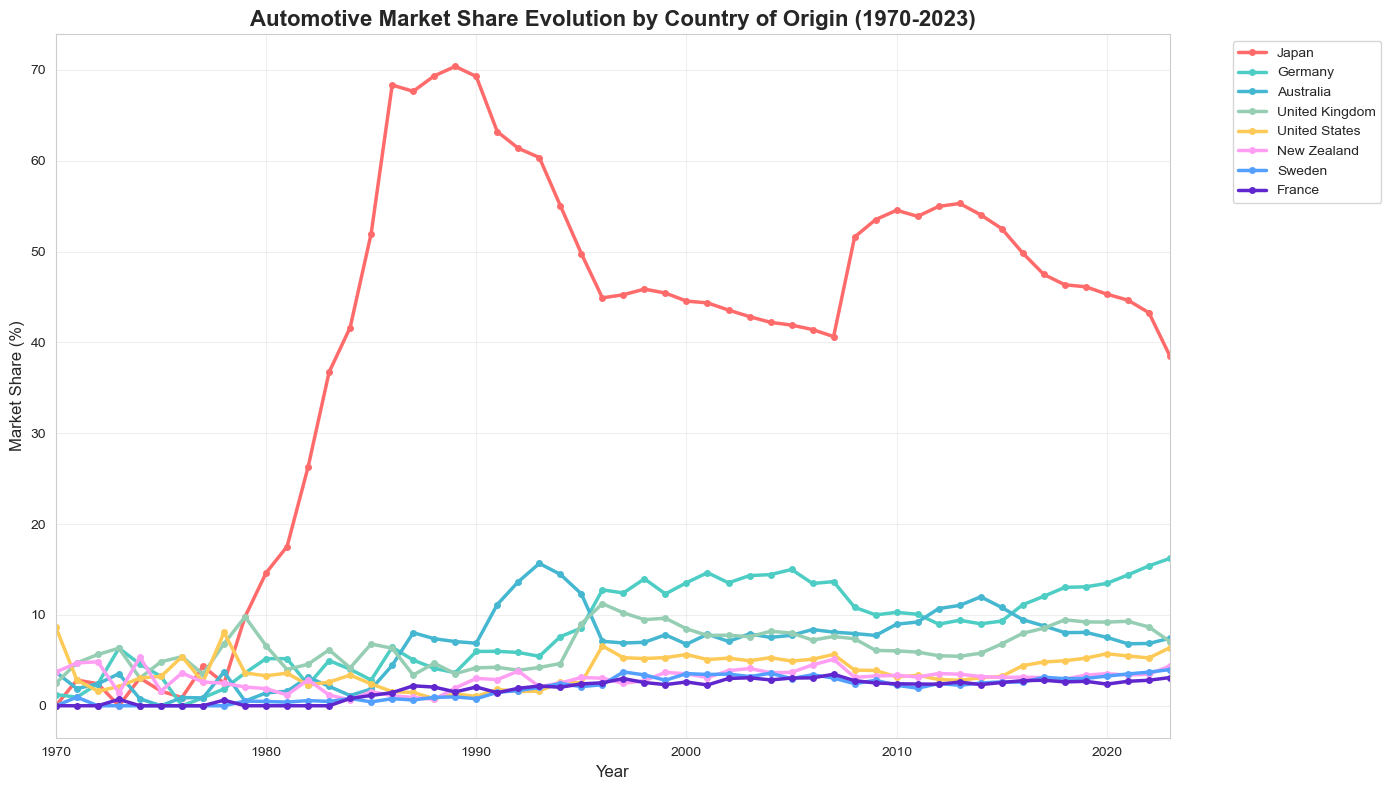

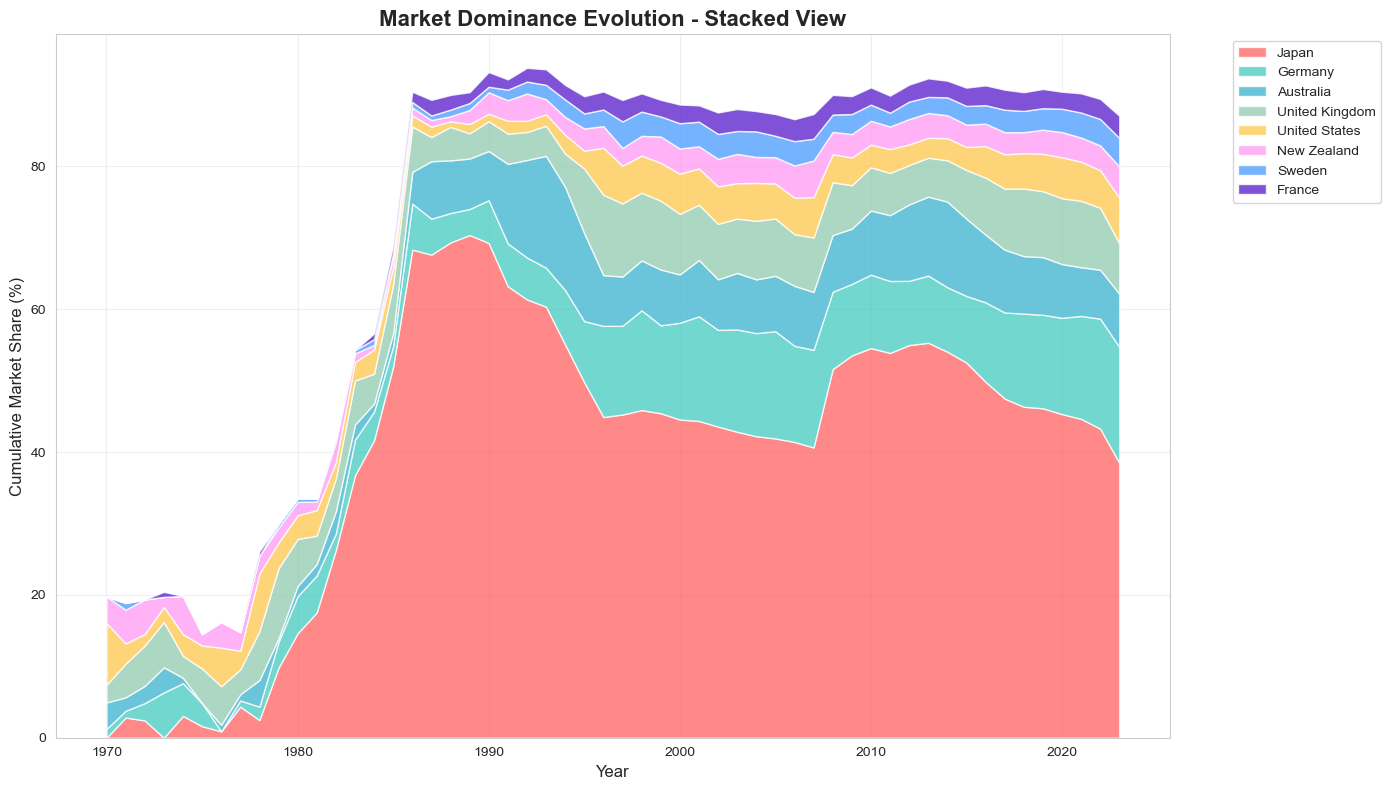


------------------------------------------------------------
MARKET DOMINANCE BY DECADE
------------------------------------------------------------
Top 5 Countries by Decade (Market Share %):

1970s:
  Not Known: 78.0%
  United Kingdom: 5.7%
  United States: 4.0%
  Japan: 3.2%
  New Zealand: 3.1%

1980s:
  Japan: 58.6%
  Not Known: 18.8%
  Australia: 5.2%
  United Kingdom: 4.7%
  Germany: 4.3%

1990s:
  Japan: 52.0%
  Australia: 9.9%
  Germany: 9.8%
  United Kingdom: 7.7%
  United States: 3.8%

2000s:
  Japan: 45.1%
  Germany: 13.1%
  Australia: 7.7%
  United Kingdom: 7.5%
  United States: 4.9%

2010s:
  Japan: 50.6%
  Germany: 11.0%
  Australia: 9.5%
  United Kingdom: 7.5%
  United States: 4.0%

2020s:
  Japan: 43.2%
  Germany: 14.8%
  United Kingdom: 8.7%
  Australia: 7.1%
  United States: 5.7%


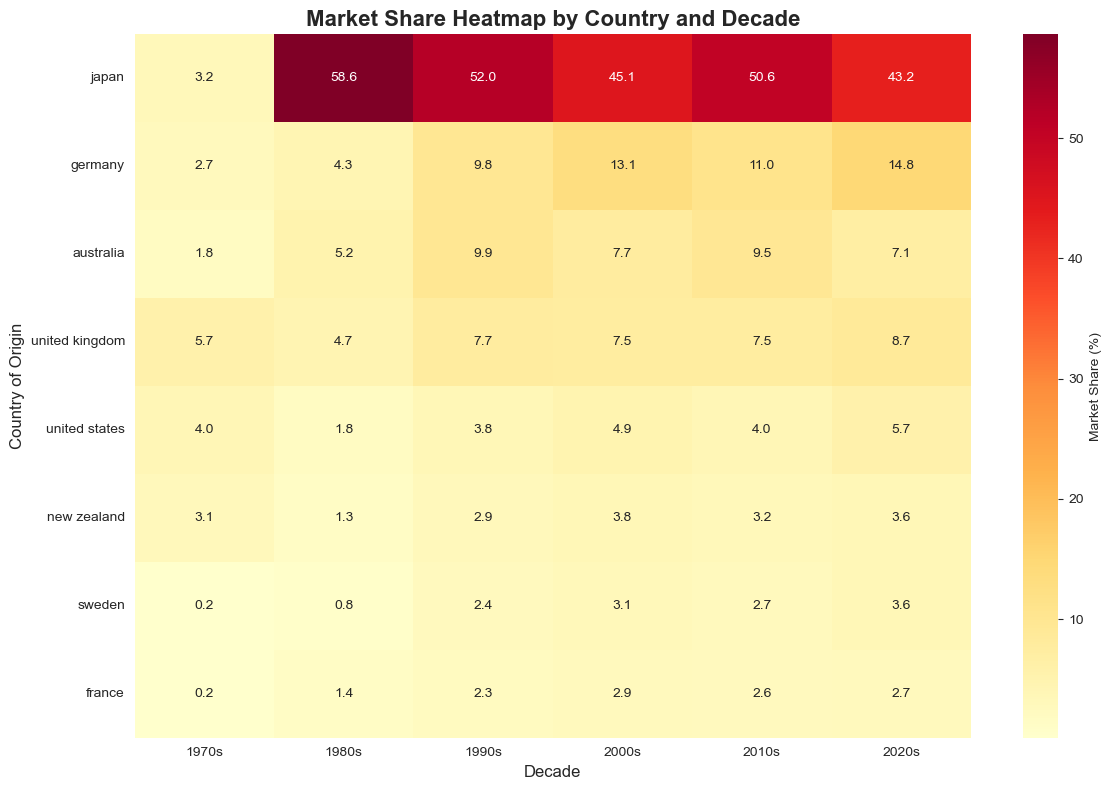


KEY INSIGHTS & TREND ANALYSIS
JAPAN ANALYSIS:
   Peak dominance: 70.4% in 1989
   Current share: 38.5% (Latest year)
   Change from peak: -31.9 percentage points

MARKET DISRUPTION POINTS:
Biggest drops in Japan's market share:
   1991: -6.1 percentage points
   1994: -5.3 percentage points
   1995: -5.3 percentage points

EMERGING MARKET TRENDS:
   Germany: Rising (+11.4pp over time)
   United Kingdom: Rising (+4.2pp over time)

STATISTICAL SUMMARY:
   Most volatile market: Japan (σ=21.0%)
   Most stable market: New Zealand (σ=1.1%)
   Years analyzed: 54 years
   Countries analyzed: 8 major markets


In [27]:
# Phase 3: Market Dominance Analysis - by Country

print("Phase 3: Market Dominance Analysis - by Country\n")

# 1. DATA PREPARATION
# Extract year from purchase_date and create analysis dataset
df_country_analysis = df_clean[['Country_of_origin', 'Purchase_date', 'Purchase_year']].copy()

# Clean and prepare data
df_country_analysis = df_country_analysis.dropna()
df_country_analysis['Country_of_origin'] = df_country_analysis['Country_of_origin'].str.lower().str.strip()

print(f"Total records for analysis: {len(df_country_analysis):,}")
print(f"Date range: {df_country_analysis['Purchase_year'].min()} - {df_country_analysis['Purchase_year'].max()}")

# 2. OVERALL MARKET SHARE ANALYSIS
print("\n" + "-"*60)
print("OVERALL MARKET SHARE BY COUNTRY")
print("-"*60)

overall_market_share = df_country_analysis['Country_of_origin'].value_counts(normalize=True) * 100
print("Top 10 Countries by Overall Market Share:")
print(overall_market_share.head(10).round(2))

# 3. IDENTIFY TOP COUNTRIES FOR DETAILED ANALYSIS
top_countries = df_country_analysis['Country_of_origin'].value_counts().head(8).index.tolist()
print(f"\nFocusing detailed analysis on: {top_countries}")

# 4. YEARLY MARKET SHARE ANALYSIS
print("\n" + "-"*60)
print("YEARLY MARKET SHARE TRENDS")
print("-"*60)

# Create yearly market share data
yearly_data = []

for year in sorted(df_country_analysis['Purchase_year'].unique()):
    year_data = df_country_analysis[df_country_analysis['Purchase_year'] == year]
    year_total = len(year_data)
    
    year_shares = year_data['Country_of_origin'].value_counts(normalize=True) * 100
    
    for country in top_countries:
        share = year_shares.get(country, 0)
        yearly_data.append({
            'Year': year,
            'Country': country,
            'Market_Share': share,
            'Units': year_shares.get(country, 0) * year_total / 100
        })

yearly_df = pd.DataFrame(yearly_data)

# 5. PIVOT TABLE FOR EASIER ANALYSIS
market_share_pivot = yearly_df.pivot(index='Year', columns='Country', values='Market_Share').fillna(0)
print("\nMarket Share by Year (%) - Sample years:")
sample_years = [1970, 1980, 1990, 2000, 2010, 2020, 2023]
available_years = [year for year in sample_years if year in market_share_pivot.index]
print(market_share_pivot.loc[available_years].round(1))

# 6. VISUALIZATION 1: LINE CHART OF MARKET SHARE EVOLUTION
plt.figure(figsize=(14, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']

for i, country in enumerate(top_countries):
    country_data = yearly_df[yearly_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Market_Share'], 
             marker='o', linewidth=2.5, markersize=4, 
             label=country.title(), color=colors[i % len(colors)])

plt.title('Automotive Market Share Evolution by Country of Origin (1970-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(df_country_analysis['Purchase_year'].min(), df_country_analysis['Purchase_year'].max())
plt.tight_layout()
plt.show()

# 7. VISUALIZATION 2: STACKED AREA CHART
plt.figure(figsize=(14, 8))

# Prepare data for stacked area chart
stacked_data = market_share_pivot[top_countries].fillna(0)
years = stacked_data.index

plt.stackplot(years, *[stacked_data[country] for country in top_countries], 
              labels=[country.title() for country in top_countries],
              colors=colors[:len(top_countries)], alpha=0.8)

plt.title('Market Dominance Evolution - Stacked View', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Market Share (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. DECADE ANALYSIS
print("\n" + "-"*60)
print("MARKET DOMINANCE BY DECADE")
print("-"*60)

def get_decade(year):
    return f"{(year//10)*10}s"

df_country_analysis['Decade'] = df_country_analysis['Purchase_year'].apply(get_decade)

decade_analysis = df_country_analysis.groupby(['Decade', 'Country_of_origin']).size().unstack(fill_value=0)
decade_percentages = decade_analysis.div(decade_analysis.sum(axis=1), axis=0) * 100

print("Top 5 Countries by Decade (Market Share %):")
for decade in sorted(df_country_analysis['Decade'].unique()):
    if decade in decade_percentages.index:
        print(f"\n{decade}:")
        top_5 = decade_percentages.loc[decade].sort_values(ascending=False).head(5)
        for country, share in top_5.items():
            print(f"  {country.title()}: {share:.1f}%")

# 9. VISUALIZATION 3: DECADE COMPARISON HEATMAP
plt.figure(figsize=(12, 8))

# Select top countries for heatmap
heatmap_data = decade_percentages[top_countries].fillna(0)

sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Market Share (%)'})
plt.title('Market Share Heatmap by Country and Decade', fontsize=16, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Country of Origin', fontsize=12)
plt.tight_layout()
plt.show()

# 10. KEY INSIGHTS AND TREND IDENTIFICATION
print("\n" + "="*80)
print("KEY INSIGHTS & TREND ANALYSIS")
print("="*80)

# Japan's dominance analysis
if 'japan' in market_share_pivot.columns:
    japan_peak_year = market_share_pivot['japan'].idxmax()
    japan_peak_share = market_share_pivot['japan'].max()
    japan_current_share = market_share_pivot['japan'].iloc[-1]
    
    print(f"JAPAN ANALYSIS:")
    print(f"   Peak dominance: {japan_peak_share:.1f}% in {japan_peak_year}")
    print(f"   Current share: {japan_current_share:.1f}% (Latest year)")
    print(f"   Change from peak: {japan_current_share - japan_peak_share:+.1f} percentage points")

# Market disruption analysis
print(f"\nMARKET DISRUPTION POINTS:")

# Calculate year-over-year changes for Japan
if 'japan' in market_share_pivot.columns:
    japan_changes = market_share_pivot['japan'].diff()
    biggest_drops = japan_changes.nsmallest(3)
    
    print("Biggest drops in Japan's market share:")
    for year, change in biggest_drops.items():
        if abs(change) > 1:  # Only show significant changes
            print(f"   {year}: {change:.1f} percentage points")

# Growth of other countries
print(f"\nEMERGING MARKET TRENDS:")
for country in ['germany', 'south korea', 'united kingdom']:
    if country in market_share_pivot.columns:
        early_share = market_share_pivot[country].iloc[:5].mean()  # First 5 years average
        late_share = market_share_pivot[country].iloc[-5:].mean()  # Last 5 years average
        growth = late_share - early_share
        
        if abs(growth) > 0.5:  # Only show significant changes
            trend = "Rising" if growth > 0 else "Declining"
            print(f"   {country.title()}: {trend} ({growth:+.1f}pp over time)")

# 11. STATISTICAL SUMMARY
print(f"\nSTATISTICAL SUMMARY:")
print(f"   Most volatile market: {market_share_pivot.std().idxmax().title()} (σ={market_share_pivot.std().max():.1f}%)")
print(f"   Most stable market: {market_share_pivot.std().idxmin().title()} (σ={market_share_pivot.std().min():.1f}%)")
print(f"   Years analyzed: {len(market_share_pivot)} years")
print(f"   Countries analyzed: {len(top_countries)} major markets")
